# Chan-Vese Segmentation
* O algoritmo de segmentação Chan-Vese é projetado para segmentar objetos sem limites claramente definidos. 
* Este algoritmo é baseado em conjuntos de níveis que são evoluídos iterativamente para minimizar uma energia, que é definida por valores ponderados que correspondem à soma das diferenças de intensidade do valor médio fora da região segmentada, a soma das diferenças do valor médio dentro da região segmentada, e um termo que depende do comprimento do limite da região segmentada.

In [1]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

* Os valores típicos para lambda1 e lambda2 são 1. Se o 'fundo' for muito diferente do objeto segmentado em termos de distribuição (por exemplo, uma imagem preta uniforme com figuras de intensidade variável), então esses valores devem ser diferentes uns dos outros;
* Os valores típicos de $mu$ estão entre 0 e 1, embora valores mais altos possam ser usados ​​ao lidar com formas com contornos muito mal definido;

* (tol) Tolerância de variação definida de nível entre iterações. Se a diferença da norma L2 entre os conjuntos de níveis de iterações sucessivas normalizadas pela área da imagem estiver abaixo desse valor, o algoritmo assumirá que a solução foi alcançada;

* (dt) Um fator de multiplicação aplicado nos cálculos para cada etapa, serve para acelerar o algoritmo. Embora valores mais altos possam acelerar o algoritmo, eles também podem levar à problemas de convergência; 

In [2]:
image = img_as_float(data.camera())
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, dt=0.5, init_level_set="checkerboard",
               extended_output=True)

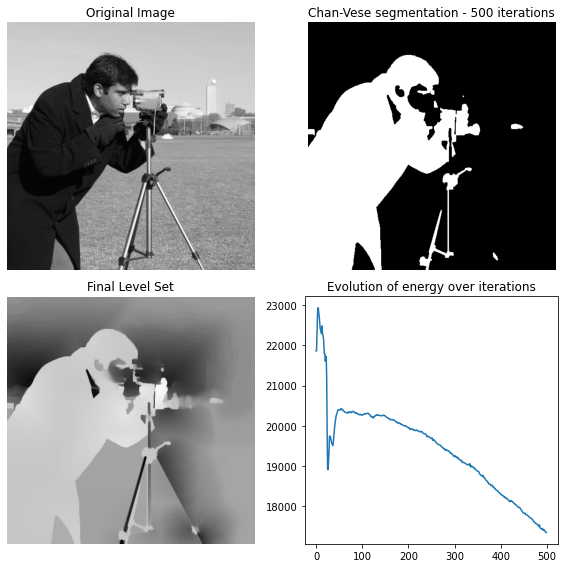

In [4]:

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()